<a href="https://colab.research.google.com/github/Supassara-pmp/Coursework/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Regression

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models.


First, run the following block to set up the variables needed for later sections.

11 4


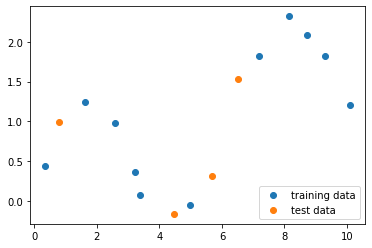

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
%matplotlib inline
import matplotlib.pyplot as plt

def part1_scatter():
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);


# NOTE: Uncomment the function below to visualize the data
part1_scatter()
print(X_train.size,X_test.size)

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

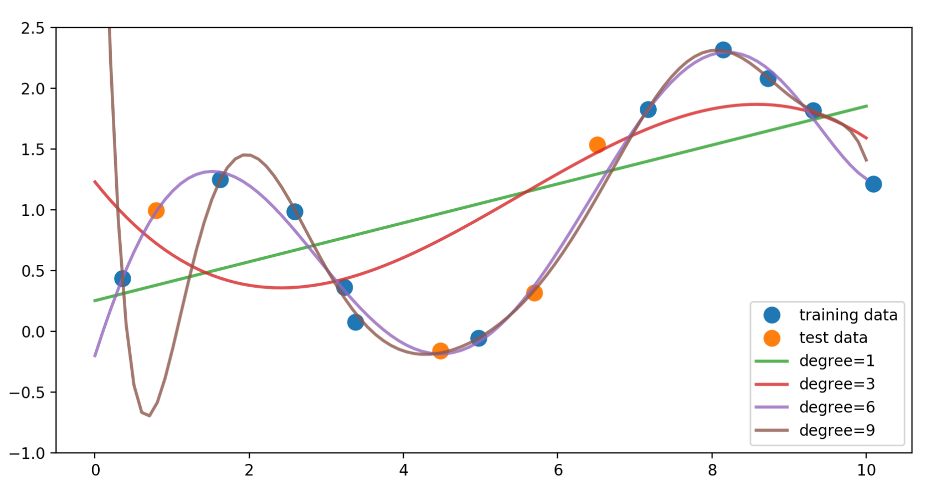

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [ ]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    result = np.zeros((4,100))
    # Your code here

    degrees = [1, 3, 6, 9]
    pred = np.linspace(0,10,100).reshape(-1,1)
    X_tr = X_train.reshape(-1,1)

    for i, degree in enumerate(degrees):

        poly = PolynomialFeatures(degree = degree)
        predict_x = poly.fit_transform(pred)
        X_poly = poly.fit_transform(X_tr)

        linreg = LinearRegression()
        linreg.fit(X_poly, y_train)
        pred_xtr = linreg.predict(predict_x)

        result[i,:] = pred_xtr

    return result

answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

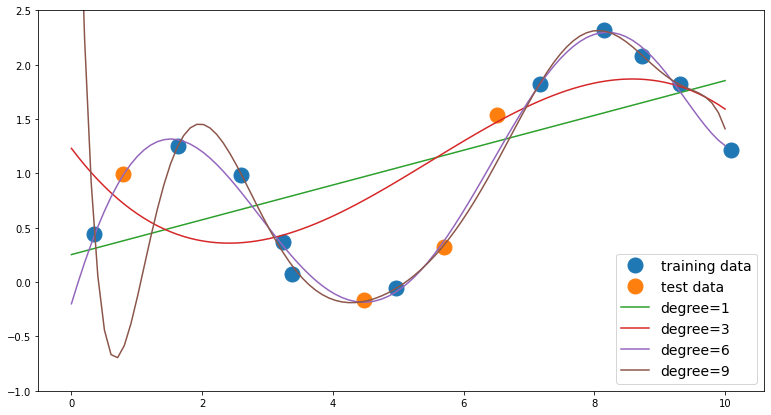

In [ ]:
# feel free to use the function plot_one() to replicate the figure
# from the prompt once you have completed question one
import matplotlib.pyplot as plt
degrees = [1, 3, 6, 9]
pred = np.linspace(0,10,100)

def plot_one(degree_predictions):
    plt.figure(figsize=(13, 7))
    plt.plot(X_train, y_train, 'o',label='training data' , markersize=15)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=15)

    for i, degree in enumerate(degrees):
        plt.plot(pred, degree_predictions[i], label='degree={}'.format(degree))

    plt.ylim(-1,2.5)
    plt.legend(loc = 4, fontsize = 14)

plot_one(answer_one())

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [ ]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    r2_train = np.zeros(10)
    r2_test = np.zeros(10)

    # Your code here

    X_tr = X_train.reshape(-1, 1)
    X_tst = X_test.reshape(-1, 1)
    degrees = np.arange(0, 10)

    for i, degree in enumerate(degrees):
      poly = PolynomialFeatures(degree = degree)
      X_poly_tr = poly.fit_transform(X_tr)
      X_poly_tst = poly.fit_transform(X_tst)

      linreg = LinearRegression()
      linreg.fit(X_poly_tr, y_train)

      pred_xtr = linreg.predict(X_poly_tr)
      pred_xtst = linreg.predict(X_poly_tst)

      r2_train[i] = r2_score(y_train, pred_xtr)
      r2_test[i] = r2_score(y_test, pred_xtst)

    return (r2_train, r2_test)

answer_two()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247951, -0.64525377]))

In [ ]:
r2_train, r2_test = answer_two()
print(r2_train)
print(r2_test)

[0.         0.42924578 0.4510998  0.58719954 0.91941945 0.97578641
 0.99018233 0.99352509 0.99637545 0.99803706]
[-0.47808642 -0.45237104 -0.06856984  0.00533105  0.73004943  0.87708301
  0.9214094   0.92021504  0.63247951 -0.64525377]


### Question 3

Plot the $R^2$ scores from question 2 to visualize the relationship between degree level and $R^2$.

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset?



*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`. There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).*

(0, 9, 6)

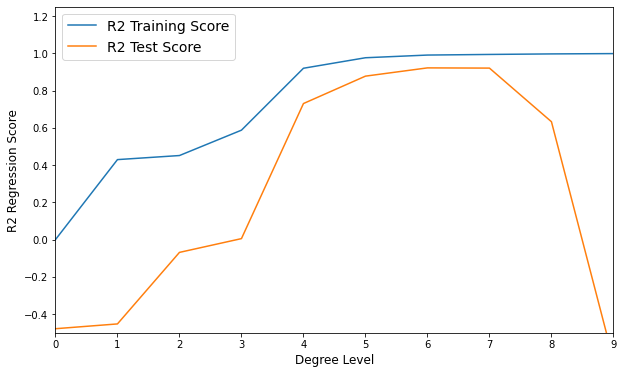

In [ ]:
import matplotlib.pyplot as plt

def answer_three():

    # plot the relationship between degree level and  𝑅2 .
    r2_train, r2_test = answer_two()
    degrees = np.arange(0, 10)

    plt.figure(figsize=(10, 6))
    plt.plot(degrees, r2_train, label = 'R2 Training Score')
    plt.plot(degrees, r2_test, label = 'R2 Test Score')
    plt.ylabel('R2 Regression Score', fontsize = 12)
    plt.xlabel('Degree Level', fontsize = 12)
    plt.ylim(-0.5, 1.25)
    plt.xlim(0, 9)
    plt.legend(fontsize = 14)

    # Find which degree level the model is undefitting, overfitting and good generalization

    r2_scores = answer_two()
    scores = pd.DataFrame({'R2 Training Score' : r2_scores[0], 'R2 Test Score' : r2_scores[1]})
    scores['Different Score'] = scores['R2 Training Score'] - scores['R2 Test Score']

    #Underfitting
    scores_udf = scores.sort_values(by=['R2 Training Score'])
    underfitting = scores_udf.index[0]

    #Overfitting
    scores_ovf = scores.sort_values(by=['Different Score'], ascending = False)
    overfitting = scores_ovf.index[0]

    #Good Generalization
    scores_good = scores.sort_values(by=['Different Score'])
    good_gen = scores_good.index[0]

    return (underfitting, overfitting, good_gen)

answer_three()

0 9 6


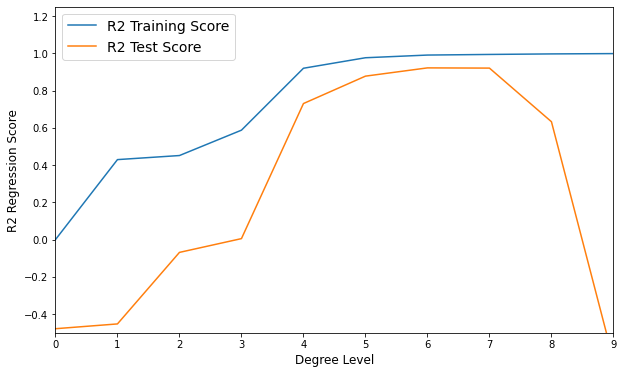

In [ ]:
degree_underfit, degree_overfit, degree_good = answer_three()
print(degree_underfit, degree_overfit, degree_good)

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score

def answer_four():
    # Your code is here

    #Polinomial Features
    X_tr = X_train.reshape(-1, 1)
    X_tst = X_test.reshape(-1, 1)
    poly = PolynomialFeatures(degree = 12)
    X_poly_tr = poly.fit_transform(X_tr)
    X_poly_tst = poly.fit_transform(X_tst)

    #non-regularized LinearRegression model
    linreg = LinearRegression()
    linreg.fit(X_poly_tr, y_train)
    regpred_xtst = linreg.predict(X_poly_tst)
    linr2test = r2_score(y_test, regpred_xtst)

    #regularized Lasso Regression model
    linlasso = Lasso(alpha = 0.01, max_iter = 10000)
    linlasso.fit(X_poly_tr, y_train)
    laspred_xtst = linlasso.predict(X_poly_tst)
    lasr2test = r2_score(y_test, laspred_xtst)

    return (linr2test, lasr2test)

answer_four()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695890253, tolerance: 0.0006894982540382801
  positive)


(-4.312001794976416, 0.8406625614750236)

In [ ]:
linr2test, lasr2test = answer_four()
print("LinearRegression_R2_test_score = ", linr2test)
print("Lasso_R2_test_score = ",lasr2test)

LinearRegression_R2_test_score =  -4.312001794976416
Lasso_R2_test_score =  0.8406625614750236


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695890253, tolerance: 0.0006894982540382801
  positive)
